In [ ]:

# Install required libraries
!pip install altair vega_datasets selenium altair_saver
!apt-get update
!apt install -y chromium-chromedriver


In [ ]:

# Configure Chrome options for Altair to export as PNG
from selenium import webdriver
from altair_saver import save

options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')

# Sample function to save Altair chart as PNG
def save_chart_as_png(chart, filename='/content/chart.png'):
    save(chart, filename, method='selenium')
    print(f"Chart saved as {filename}")


# Olympics Data Visualization

**IMPORT**

In [1]:
!pip install pillow

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.image as mpimg
from PIL import Image
from IPython.display import display

In [2]:
# Memuat dataset
file_path = '/content/Tokyo_2020_Olympics.csv'
data = pd.read_csv(file_path)

# Preprocessing data
# Memfilter data untuk menghapus baris dengan NaN di kolom 'Medal'
data_medals = data.dropna(subset=['Medal'])

# Menghitung medali berdasarkan Tim dan jenis Medali
medal_counts = data_medals.groupby(['Team', 'Medal']).size().unstack(fill_value=0)
medal_counts = medal_counts.rename(columns={'Gold': 'Emas', 'Silver': 'Perak', 'Bronze': 'Perunggu'})

# Menambahkan kolom Total_Medals
medal_counts['Total_Medals'] = medal_counts.sum(axis=1).astype(int)


In [3]:
# Memfilter data untuk Tokyo 2020 (Olimpiade Musim Panas)
tokyo_data = data[(data['Year'] == 2020) & (data['Season'] == 'Summer')].copy()

# Menghapus kolom yang tidak perlu (misalnya, 'Unnamed: 0' jika ada)
if 'Unnamed: 0' in tokyo_data.columns:
    tokyo_data = tokyo_data.drop(columns=['Unnamed: 0'])

# Mengonversi 'Age' menjadi integer (jika tidak NaN)
tokyo_data['Age'] = tokyo_data['Age'].fillna(0).astype(int)

# Menampilkan 5 baris pertama
tokyo_data.head()

,Name,Sex,Age,Team,Games,Year,Season,Sport,Medal
0,AAJIM Munkhbat,Male,32,Mongolia,2020 Summer,2020,Summer,Judo,0
1,ABARZA Alberto,Male,36,Chile,2020 Summer,2020,Summer,Swimming,3
2,ABASLI Namig,Male,23,Azerbaijan,2020 Summer,2020,Summer,Judo,1
3,ABASSI Mostefa,Male,43,Algeria,2020 Summer,2020,Summer,Wheelchair Basketball,0
4,ABBAD Abderraouf,Male,34,Algeria,2020 Summer,2020,Summer,Wheelchair Basketball,0


In [4]:
# Menampilkan 5 baris terakhir
tokyo_data.tail()

,Name,Sex,Age,Team,Games,Year,Season,Sport,Medal
4522,ZURABIANI Zurab,Male,21,Georgia,2020 Summer,2020,Summer,Judo,0
4523,ZURBRUGG Lindsey,Female,22,United States of America,2020 Summer,2020,Summer,Wheelchair Basketball,1
4524,ZVINOWANDA Vimbai,Female,29,Zimbabwe,2020 Summer,2020,Summer,Athletics,0
4525,ZWOUKHI Fathi,Male,34,Tunisia,2020 Summer,2020,Summer,Triathlon,0
4526,ZYLKA Krzysztof,Male,41,Poland,2020 Summer,2020,Summer,Table Tennis,0


In [5]:
# Menghapus kolom 'Games'
tokyo_data = tokyo_data.drop(columns=['Games'])

# Menampilkan 5 baris pertama setelah penghapusan kolom
tokyo_data.head()

,Name,Sex,Age,Team,Year,Season,Sport,Medal
0,AAJIM Munkhbat,Male,32,Mongolia,2020,Summer,Judo,0
1,ABARZA Alberto,Male,36,Chile,2020,Summer,Swimming,3
2,ABASLI Namig,Male,23,Azerbaijan,2020,Summer,Judo,1
3,ABASSI Mostefa,Male,43,Algeria,2020,Summer,Wheelchair Basketball,0
4,ABBAD Abderraouf,Male,34,Algeria,2020,Summer,Wheelchair Basketball,0


## 1. Visualisasi Medali Berdasarkan Negara (Top 10 Negara)

<ipython-input-6-1b9f74ca4b82>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  medals_data['Medal'] = medals_data['Medal'].map(medal_map)


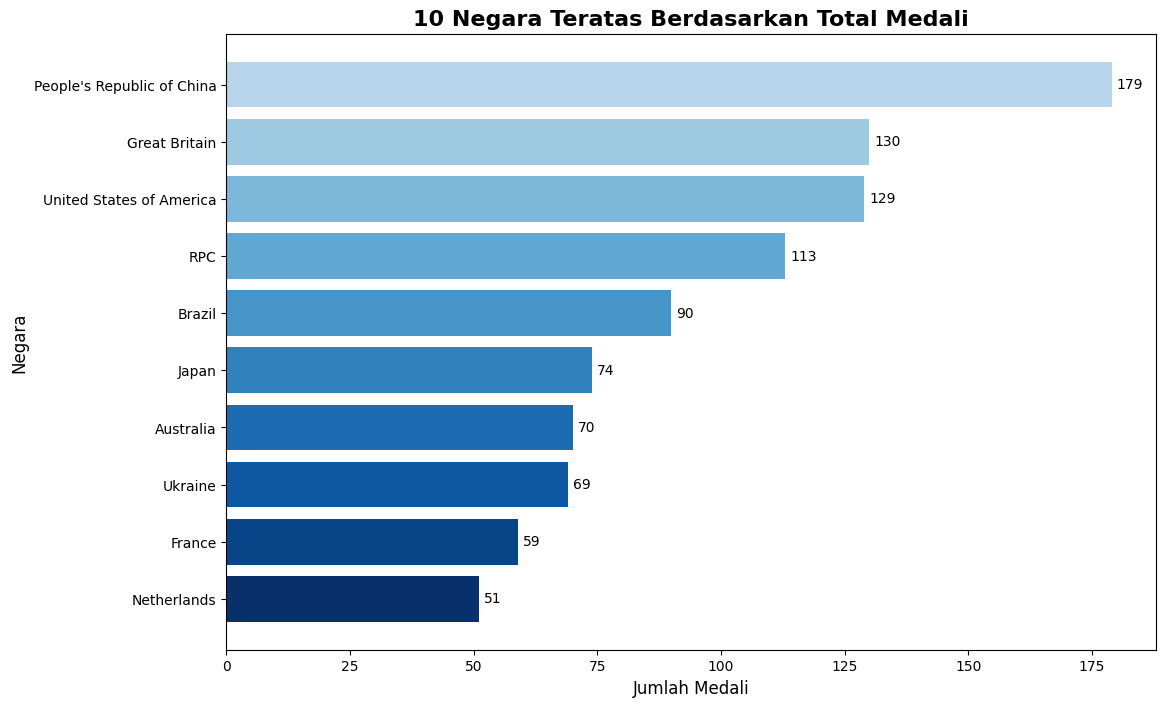

In [6]:
# Memfilter data untuk hanya menyertakan baris di mana Medali adalah Perunggu (1), Perak (2), atau Emas (3)
medals_data = tokyo_data[tokyo_data['Medal'].isin([1, 2, 3])]

# Memetakan kode medali ke label deskriptif untuk keterbacaan yang lebih baik (opsional)
medal_map = {1: 'Perunggu', 2: 'Perak', 3: 'Emas'}
medals_data['Medal'] = medals_data['Medal'].map(medal_map)

# Menghitung total medali berdasarkan tim, menyaring entri yang bukan medali
medal_counts = medals_data.groupby('Team').size().reset_index(name='Total_Medals')

# Mendapatkan 10 negara teratas berdasarkan total medali
top_countries = medal_counts.nlargest(10, 'Total_Medals')

# Membuat plot batang dengan gradien warna
plt.figure(figsize=(12, 8))
colors = plt.cm.Blues(np.linspace(0.3, 1, len(top_countries)))
bars = plt.barh(top_countries['Team'], top_countries['Total_Medals'], color=colors)
plt.gca().invert_yaxis()
plt.title('10 Negara Teratas Berdasarkan Total Medali', fontsize=16, fontweight='bold')
plt.xlabel('Jumlah Medali', fontsize=12)
plt.ylabel('Negara', fontsize=12)

# Menambahkan nilai pada setiap batang
for bar in bars:
    plt.text(bar.get_width() + 1, bar.get_y() + bar.get_height()/2, f'{int(bar.get_width())}', va='center', fontsize=10)

plt.show()


## 2. Distribusi Jenis Medali (Emas, Perak, Perunggu)

<ipython-input-7-f23c44046c3c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  medals_data['Medal'] = medals_data['Medal'].map(medal_map)


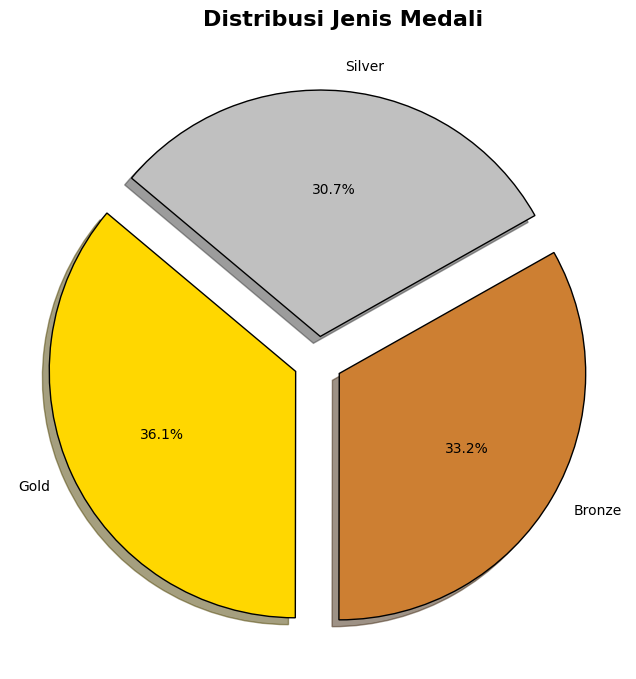

In [7]:

# Filter data untuk hanya menyertakan medali Bronze, Silver, dan Gold
medals_data = tokyo_data[tokyo_data['Medal'].isin([1, 2, 3])]

# Map kode medali ke label deskriptif
medal_map = {1: 'Bronze', 2: 'Silver', 3: 'Gold'}
medals_data['Medal'] = medals_data['Medal'].map(medal_map)

# Hitung jumlah medali per tipe
medal_counts = medals_data['Medal'].value_counts()

# Visualisasi dengan pie chart
explode = (0.1, 0.1, 0.1)  # Memperbesar semua slice sedikit
colors = ['#FFD700', '#CD7F32', '#C0C0C0']  # Warna untuk Bronze, Silver, dan Gold

plt.figure(figsize=(10, 8))
plt.pie(medal_counts, labels=medal_counts.index, autopct='%1.1f%%', startangle=140, colors=colors,
        explode=explode, shadow=True, wedgeprops={'edgecolor': 'black'})
plt.title('Distribusi Jenis Medali', fontsize=16, fontweight='bold', loc='center', pad=20, x=0.54)
plt.show()


## 3. Negara ikut serta berdasarkan kontinen

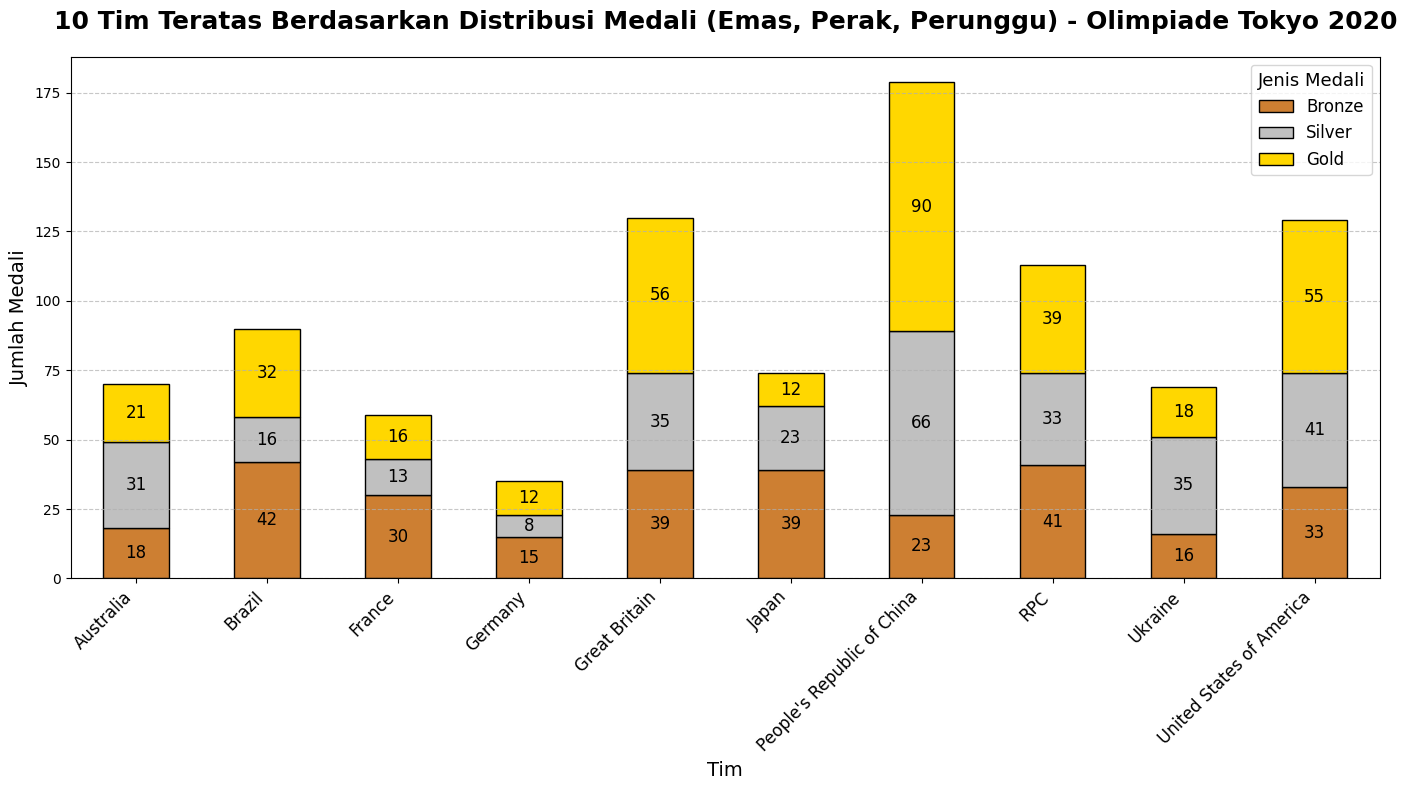

In [8]:
# Filter data untuk Olimpiade Tokyo 2020
tokyo_2020_data = data[(data['Year'] == 2020) & (data['Season'] == 'Summer')]

# Filter data untuk menyertakan baris yang memiliki informasi medali
medals_data = tokyo_2020_data.dropna(subset=['Medal'])

# Mapping kode medali ke label deskriptif
medal_map = {1: 'Bronze', 2: 'Silver', 3: 'Gold'}
medals_data['Medal'] = medals_data['Medal'].map(medal_map)

# Hitung 10 tim teratas berdasarkan total medali
top_teams = medals_data['Team'].value_counts().nlargest(10).index
top_teams_data = medals_data[medals_data['Team'].isin(top_teams)]

# Kelompokkan berdasarkan tim dan jenis medali untuk mendapatkan distribusi medali
medal_distribution = top_teams_data.groupby(['Team', 'Medal']).size().unstack(fill_value=0)
medal_distribution = medal_distribution[['Bronze', 'Silver', 'Gold']]  # Urutan: Bronze, Silver, Gold

# Buat plot stacked bar dengan warna yang ditentukan
fig, ax = plt.subplots(figsize=(14, 8))
colors = ['#cd7f32', '#c0c0c0', '#ffd700']  # Warna untuk Bronze, Silver, Gold

# Plot stacked bar dengan warna khusus
medal_distribution.plot(kind='bar', stacked=True, color=colors, ax=ax, edgecolor='black')

# Tambahkan judul dan label dengan font size yang disesuaikan
plt.title('10 Tim Teratas Berdasarkan Distribusi Medali (Emas, Perak, Perunggu) - Olimpiade Tokyo 2020', fontsize=18, fontweight='bold', loc='center', pad=20)
plt.xlabel('Tim', fontsize=14)
plt.ylabel('Jumlah Medali', fontsize=14)

# Tambahkan grid untuk meningkatkan keterbacaan
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Menambahkan anotasi untuk setiap jumlah medali di atas setiap bagian bar
for i in range(len(medal_distribution)):
    y_offset = 0  # Mulai dari offset nol untuk setiap tim
    for j, medal in enumerate(['Bronze', 'Silver', 'Gold']):
        count = medal_distribution.iloc[i][medal]
        if count > 0:
            # Posisi teks dengan jarak untuk setiap bagian bar
            ax.text(i, y_offset + count / 2, str(count), ha='center', va='center',
                    fontsize=12, color='black')  # Warna teks putih untuk kontras
            y_offset += count  # Tambahkan offset sesuai tinggi bar saat ini

# Rotasi label sumbu x untuk keterbacaan
plt.xticks(rotation=45, ha='right', fontsize=12)

# Tampilkan legenda dengan judul
plt.legend(title='Jenis Medali', fontsize=12, title_fontsize='13', loc='upper right')

plt.tight_layout()
plt.show()

## 4. Analisis Atlet Berdasarkan Jenis Kelamin

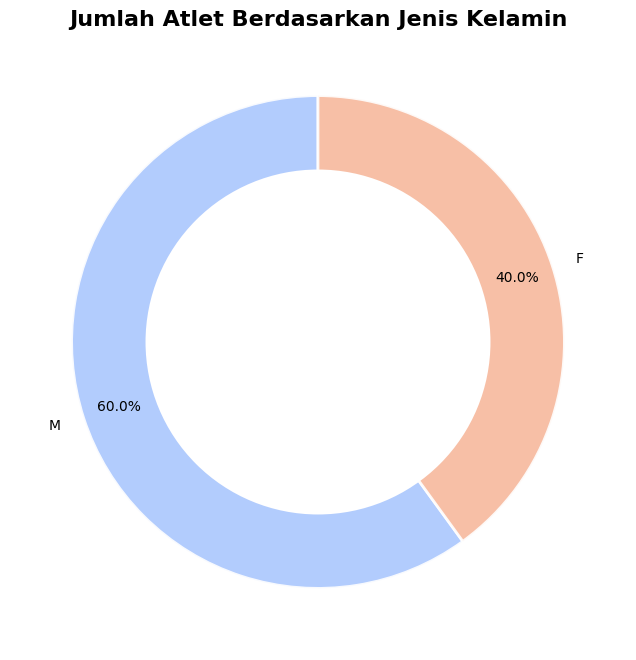

In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Contoh data dengan proporsi berbeda
data = pd.DataFrame({'Sex': ['M', 'F', 'M', 'F', 'F', 'M', 'M', 'F', 'M', 'M']})
data['Sex'] = data['Sex'].replace({'Male': 'M', 'Female': 'F'})
gender_counts = data['Sex'].value_counts().reset_index()
gender_counts.columns = ['Gender', 'Count']

# Setup warna
colors = sns.color_palette("coolwarm", len(gender_counts))

# Membuat chart donat
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(aspect="equal"))

# Membuat chart dengan persentase yang benar
wedges, texts, autotexts = ax.pie(
    gender_counts['Count'],
    labels=gender_counts['Gender'],
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    pctdistance=0.85,
    wedgeprops={"edgecolor": "white", "linewidth": 2, "alpha": 0.9},
)

# Menambahkan lingkaran di tengah untuk membuat bentuk donat
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

# Menampilkan judul
plt.title('Jumlah Atlet Berdasarkan Jenis Kelamin', fontsize=16, fontweight='bold')
plt.show()


#  5. Umur Atlit Olimpiade Tokyo 2020

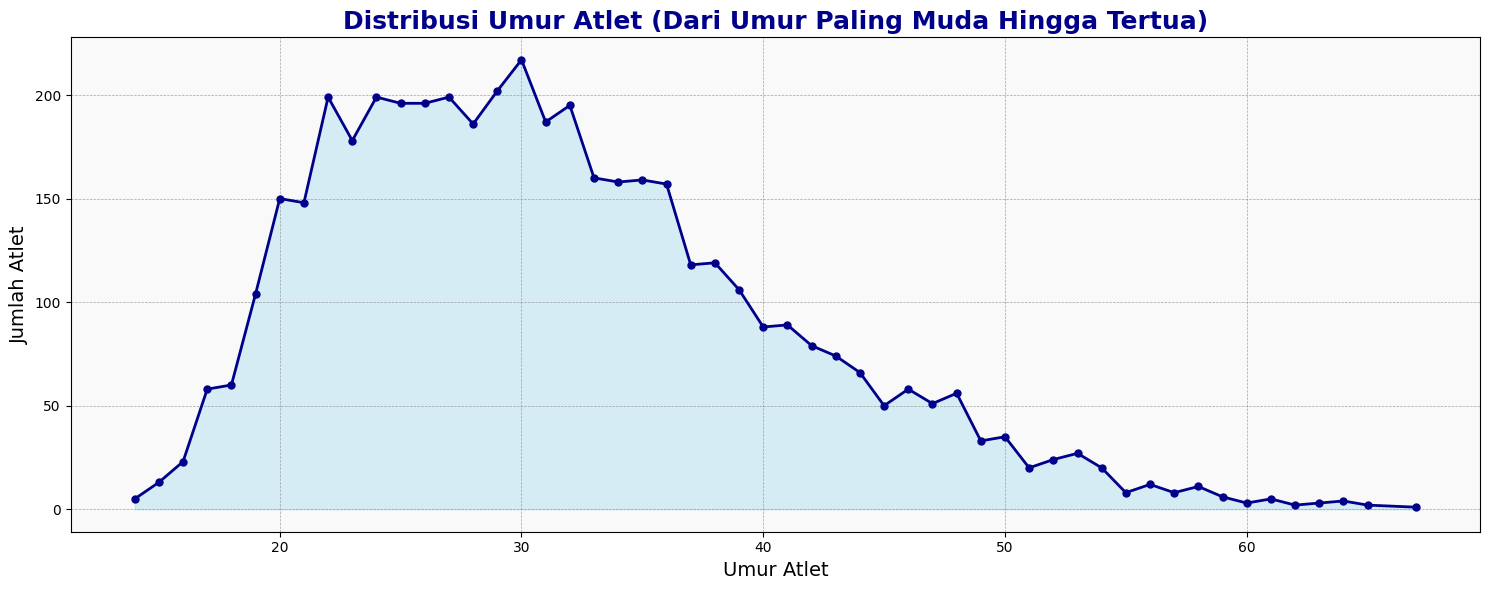

Rata-rata umur atlet yang mengikuti Olimpiade Tokyo 2020 adalah 31.46 tahun.


In [10]:
# Menghapus baris dengan nilai umur yang hilang untuk menghindari masalah NaN dalam analisis
age_data = tokyo_2020_data.dropna(subset=['Age'])

# Menghitung jumlah atlet untuk setiap umur, mulai dari yang termuda hingga tertua
age_distribution = age_data['Age'].value_counts().sort_index()

# Membuat gradien warna
colors = plt.cm.viridis(np.linspace(0.3, 1, len(age_distribution)))

# Membuat plot tren umur menggunakan plot garis dengan warna gradien
plt.figure(figsize=(15, 6))
plt.plot(age_distribution.index, age_distribution.values, marker='o', color='darkblue', linestyle='-', linewidth=2, markersize=5)

# Menggunakan fill_between untuk membuat efek gradien di bawah garis
plt.fill_between(age_distribution.index, age_distribution.values, color='skyblue', alpha=0.3)

# Mengatur judul dan label dengan ukuran dan gaya font yang disesuaikan
plt.title('Distribusi Umur Atlet (Dari Umur Paling Muda Hingga Tertua)', fontsize=18, fontweight='bold', color='darkblue')
plt.xlabel('Umur Atlet', fontsize=14)
plt.ylabel('Jumlah Atlet', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Menyesuaikan latar belakang plot dan grid
plt.gca().set_facecolor('#f9f9f9')
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

plt.tight_layout()
plt.show()

# Menghitung rata-rata umur atlet yang mengikuti Olimpiade
average_age = age_data['Age'].mean()
print(f"Rata-rata umur atlet yang mengikuti Olimpiade Tokyo 2020 adalah {average_age:.2f} tahun.")



#  6. Jumlah Negara Dengan Perkakilan Atlet Terbanyak di Olimpiade Tokyo 2020

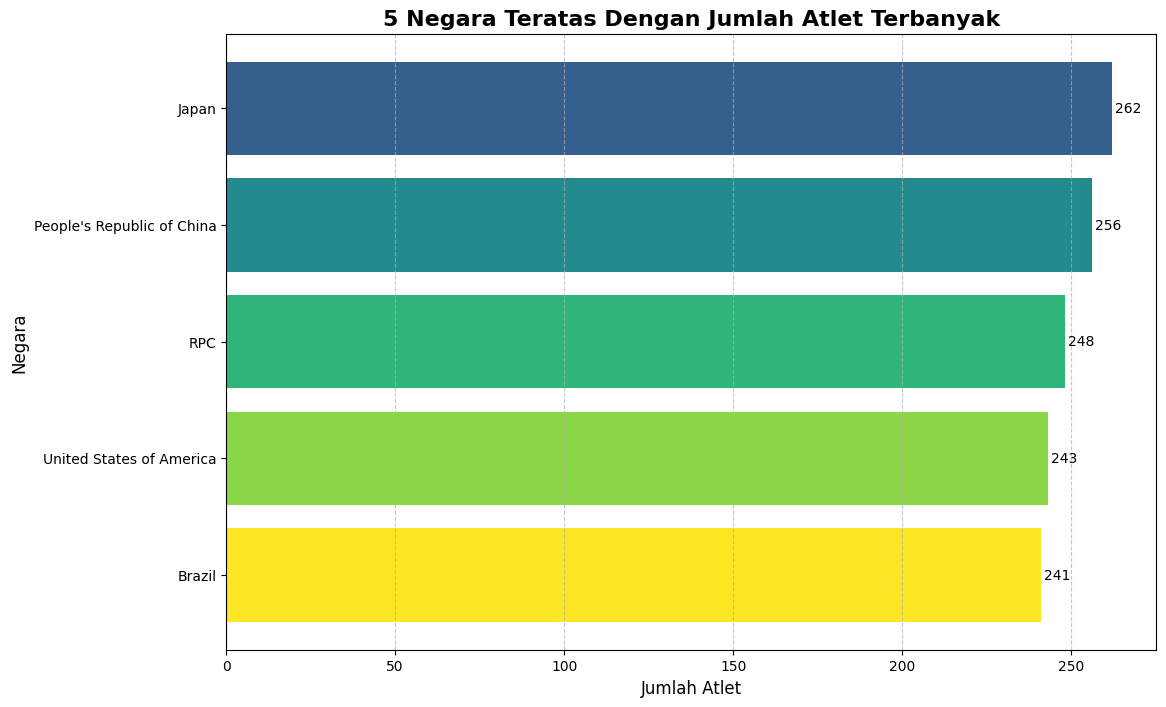

In [11]:
# Menghitung jumlah atlet untuk setiap negara
athlete_counts = tokyo_data['Team'].value_counts().reset_index()
athlete_counts.columns = ['Team', 'Total_Athletes']

# Mendapatkan 5 negara teratas berdasarkan jumlah atlet
top_athletes = athlete_counts.nlargest(5, 'Total_Athletes')

# Membuat bar plot dengan gradien warna
plt.figure(figsize=(12, 8))
colors = plt.cm.viridis(np.linspace(0.3, 1, len(top_athletes)))  # Membuat gradien warna
bars = plt.barh(top_athletes['Team'], top_athletes['Total_Athletes'], color=colors)

# Menambahkan judul dan label
plt.title('5 Negara Teratas Dengan Jumlah Atlet Terbanyak', fontsize=16, fontweight='bold')
plt.xlabel('Jumlah Atlet', fontsize=12)
plt.ylabel('Negara', fontsize=12)

# Menambahkan nilai pada setiap batang
for bar in bars:
    plt.text(bar.get_width() + 1, bar.get_y() + bar.get_height()/2, f'{int(bar.get_width())}', va='center', fontsize=10)

plt.gca().invert_yaxis()  # Membalik sumbu y agar negara dengan jumlah atlet terbanyak muncul di atas
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

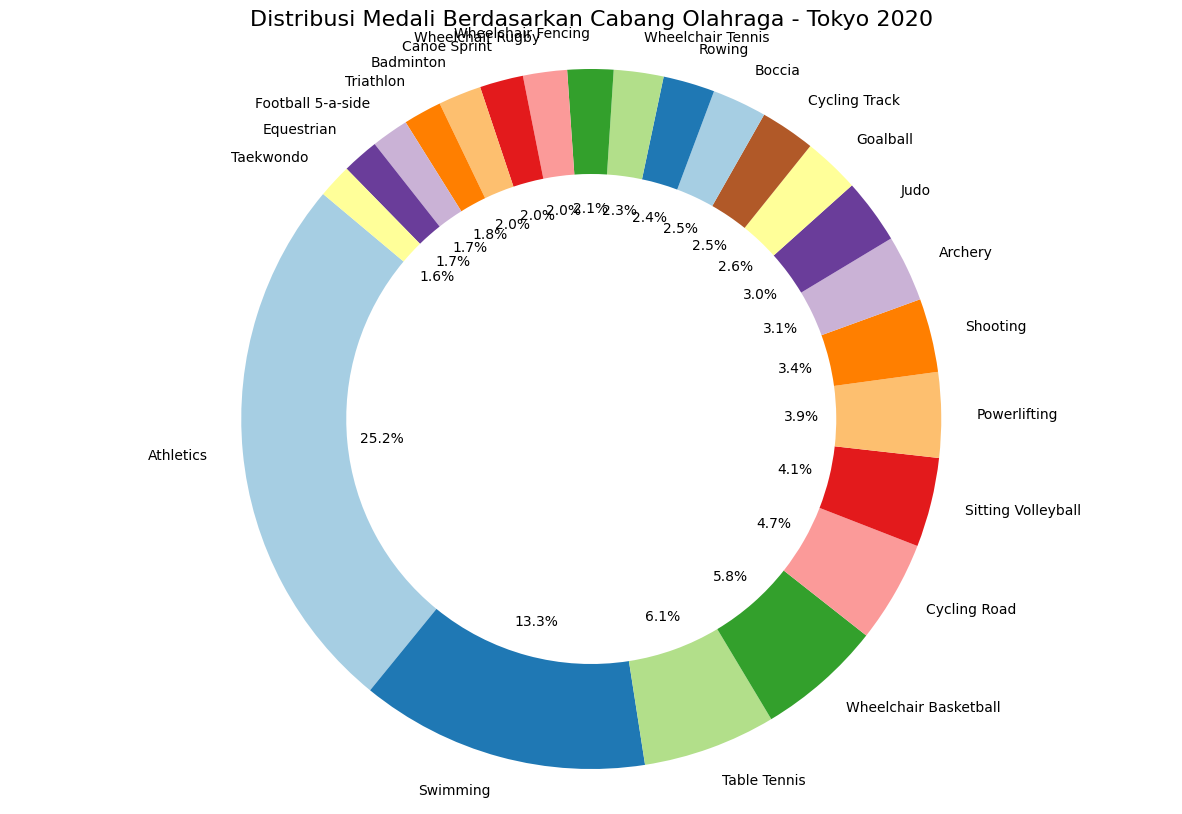

In [14]:
# Filter Medali
medals_data = tokyo_2020_data.dropna(subset=['Medal'])

# Menghitung jumlah medali dalam cabang olahraga
medals_by_sport = medals_data['Sport'].value_counts()

# Plotting
plt.figure(figsize=(15, 10))
plt.pie(medals_by_sport, labels=medals_by_sport.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors, wedgeprops={'width': 0.3})
plt.title('Distribusi Medali Berdasarkan Cabang Olahraga - Tokyo 2020', fontsize=16)
plt.axis('equal')
plt.show()